In [1]:
# 네이버 증권 유가 크롤링

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

import datetime
import re

In [ ]:
import warnings
warnings.simplefilter("ignore")


import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [3]:
(datetime.datetime(2021,11,12) - datetime.datetime(2015,12,31))

datetime.timedelta(days=2143)

# 1. 두바이유 유가 크롤링
# 기간 : 2016/01/01~2021/10/31

In [4]:
# 두바이유

url_du = 'https://finance.naver.com/marketindex/worldDailyQuote.naver?marketindexCd=OIL_DU&fdtc=2'
# url_du_p = 'https://finance.naver.com/marketindex/worldDailyQuote.naver?marketindexCd=OIL_DU&fdtc=2&page={}'.format(i)

L_d = []
for i in range(1,250):
    url_du_p = 'https://finance.naver.com/marketindex/worldDailyQuote.naver?marketindexCd=OIL_DU&fdtc=2&page={}'.format(i)
    
    res = requests.get(url_du_p)
    
    soup = BeautifulSoup(res.text, 'html.parser')
    
    path1 = 'body > div > table > tbody > tr'
    date = soup.select(path1)

# 정규표현식을 이용하여 단어 클리닝        
    for i in date:
        i = re.sub('[\n\t]', '', i.text)
        L_d.append(i)
    

In [5]:
# 추출된 리스트를 각 변수로 나눈다.
date = np.array([i[:10] for i in L_d ])
Close = np.array([i[10:15] for i in L_d ])
# before = np.array([i[15:20] for i in L ])
# ratio = np.array([i[20:] for i in L ])

# 데이터를 판다스로 저장
dic = {'날짜' : date, '종가' : Close}   #, '전일대비' : before, '등락율' : ratio}
df_Du = pd.DataFrame(dic)
df_Du['날짜'] = df_Du['날짜'].astype('datetime64[ns]')
df_Du['종가'] = df_Du['종가'].astype('float64')
# df_Du['등락율'] = df_Du['등락율'].apply(lambda x : re.sub('%','',x))
# df_Du[['종가','전일대비','등락율']] = df_Du[['종가','전일대비','등락율']].astype('float64')

In [6]:
len(L_d)

1743

In [7]:
df_Du.shape

(1743, 2)

In [8]:
df_Du

,날짜,종가
0,2021-11-12,81.48
1,2021-11-11,81.67
2,2021-11-10,81.27
3,2021-11-09,82.58
4,2021-11-08,81.62
...,...,...
1738,2014-12-18,60.05
1739,2014-12-17,60.73
1740,2014-12-16,60.40
1741,2014-12-15,61.13


In [445]:
# 전일대비에 - 값이 안들어가서 다시 연산함
# try :
#     for i in range(len(df_Du)) :
#         df_Du.iloc[i,2] = df_Du.iloc[i+1,1] - df_Du.iloc[i,1]
# except:
#     pass

In [446]:
# 날짜별로 데이터 나누기

In [9]:
# df_Du = df_Du[(df_Du['날짜'] < '2021-11-1') & (df_Du['날짜'] > '2015-12-30')]
# df_Du.index = range(len(df_Du))
# df_Du

In [10]:
df_Du.columns = ['date','두바이유_유가(종가)']

In [32]:
# pd.to_datetime(df_Du['날짜'])

In [180]:
# csv 저장
df_Du.to_csv('두바이유가.csv', encoding = 'utf-8-sig')

In [11]:
df_Du.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1743 non-null   datetime64[ns]
 1   두바이유_유가(종가)  1743 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.4 KB


# 2. 브랜트유 유가 크롤링
# 기간 : 2016/01/01~2021/10/31

In [12]:
# 브랜트유
url_brt = 'https://finance.naver.com/marketindex/worldOilDetail.naver?marketindexCd=OIL_BRT&fdtc=2'
# url_brt_p = 'https://finance.naver.com/marketindex/worldDailyQuote.naver?marketindexCd=OIL_BRT&fdtc=2&page={}'.format(i)

In [18]:
# 브랜트유 유가 크롤링 코드

L_b = []
for i in range(1,250):
    url_brt_p = 'https://finance.naver.com/marketindex/worldDailyQuote.naver?marketindexCd=OIL_BRT&fdtc=2&page={}'.format(i)

    res = requests.get(url_brt_p)
    
    soup = BeautifulSoup(res.text, 'html.parser')
    
    path1 = 'body > div > table > tbody > tr'
    date = soup.select(path1)
        
    for i in date:

# 정규표현식을 이용하여 단어 클리닝
        i = re.sub('[\n\t]', '', i.text)
        L_b.append(i)
    

In [19]:
len(L_b)

1743

In [20]:
# 추출된 리스트를 각 변수로 나눈다.
date = np.array([i[:10] for i in L_b])
Close = np.array([i[10:15] for i in L_b])
# before = np.array([i[15:20] for i in L ])
# ratio = np.array([i[20:] for i in L ])

# 데이터를 판다스로 저장
dic = {'날짜' : date, '종가' : Close } #, '전일대비' : before, '등락율' : ratio}
df_brt = pd.DataFrame(dic)
df_brt['날짜'] = df_brt['날짜'].astype('datetime64[ns]')
df_brt['종가'] = df_brt['종가'].astype('float64')
# df_brt['등락율'] = df_brt['등락율'].apply(lambda x : re.sub('%','',x))
# df_brt[['종가','전일대비','등락율']] = df_brt[['종가','전일대비','등락율']].astype('float64')

In [21]:
df_brt.shape

(1743, 2)

In [22]:
df_brt

,날짜,종가
0,2021-11-12,82.17
1,2021-11-11,82.87
2,2021-11-10,82.64
3,2021-11-09,84.78
4,2021-11-08,83.43
...,...,...
1738,2015-02-12,57.05
1739,2015-02-11,54.66
1740,2015-02-10,56.43
1741,2015-02-09,58.34


In [34]:
# # 날짜별로 데이터 나누기
# df_brt = df_brt[(df_brt['날짜'] < '2021-11-1') & (df_brt['날짜'] > '2015-12-30')]
# df_brt.index = range(len(df_brt))

In [23]:
df_brt.columns = ['date','브렌트유_유가(종가)']

In [24]:
df_brt

,date,브렌트유_유가(종가)
0,2021-11-12,82.17
1,2021-11-11,82.87
2,2021-11-10,82.64
3,2021-11-09,84.78
4,2021-11-08,83.43
...,...,...
1738,2015-02-12,57.05
1739,2015-02-11,54.66
1740,2015-02-10,56.43
1741,2015-02-09,58.34


In [484]:
# 전일대비에 - 값이 안들어가서 다시 연산함

In [485]:
# try :
#     for i in range(len(df_Du)) :
#         df_brt.iloc[i,2] = df_brt.iloc[i+1,1] - df_brt.iloc[i,1]
# except:
#     pass

In [179]:
# csv 저장
df_brt.to_csv('브렌트유유가.csv', encoding = 'utf-8-sig')

# 3. 텍사스유 유가 크롤링
# 기간 : 2016/01/01~2021/10/31

In [25]:
# 텍사스유
url_tex = 'https://finance.naver.com/marketindex/worldOilDetail.naver?marketindexCd=OIL_CL&fdtc=2'
# url_tex_p = 'https://finance.naver.com/marketindex/worldDailyQuote.naver?marketindexCd=OIL_CL&fdtc=2&page={}'.format(i)

In [26]:
# 텍사스유 유가 크롤링 코드

L_t = []
for i in range(1,250):
    url_tex_p = 'https://finance.naver.com/marketindex/worldDailyQuote.naver?marketindexCd=OIL_CL&fdtc=2&page={}'.format(i)
       
    res = requests.get(url_tex_p)
    
    soup = BeautifulSoup(res.text, 'html.parser')
    
    path1 = 'body > div > table > tbody > tr'
    date = soup.select(path1)
        
    for i in date:

# 정규표현식을 이용하여 단어 클리닝
        i = re.sub('[\n\t]', '', i.text)
        L_t.append(i)
    

In [27]:
len(L_t)

1743

In [28]:
# 추출된 리스트를 각 변수로 나눈다.
date = np.array([i[:10] for i in L_t ])
Close = np.array([i[10:15] for i in L_t ])
# before = np.array([i[15:20] for i in L ])
# ratio = np.array([i[20:] for i in L ])

# 데이터를 판다스로 저장
dic = {'날짜' : date, '종가' : Close} #, '전일대비' : before, '등락율' : ratio}
df_tex = pd.DataFrame(dic)
df_tex['날짜'] = df_tex['날짜'].astype('datetime64[ns]')
df_tex['종가'] = df_tex['종가'].astype('float64')
# df_tex['등락율'] = df_tex['등락율'].apply(lambda x : re.sub('%','',x))
# df_tex[['종가','전일대비','등락율']] = df_tex[['종가','전일대비','등락율']].astype('float64')

In [29]:
df_tex.shape

(1743, 2)

In [178]:
# 날짜별로 데이터 나누기
df_tex = df_tex[(df_tex['날짜'] < '2021-11-1') & (df_tex['날짜'] > '2015-12-30')]

KeyError: '날짜'

In [28]:
# try :
#     for i in range(len(df_Du)) :
#         df_tex.iloc[i,2] = df_tex.iloc[i+1,1] - df_tex.iloc[i,1]
# except:
#     pass

In [29]:
# 날짜별로 데이터 나누기

In [30]:
df_tex.columns = ['date','텍사스유_유가(종가)']

In [177]:
# csv 저장
df_tex.to_csv('텍사스유유가.csv', encoding = 'utf-8-sig')

In [31]:
df_tex

,date,텍사스유_유가(종가)
0,2021-11-12,80.79
1,2021-11-11,81.59
2,2021-11-10,81.34
3,2021-11-09,84.15
4,2021-11-08,81.93
...,...,...
1738,2015-01-02,52.69
1739,2015-01-01,53.27
1740,2014-12-31,53.27
1741,2014-12-30,54.12


In [34]:
df_Du

,date,두바이유_유가(종가)
0,2021-11-12,81.48
1,2021-11-11,81.67
2,2021-11-10,81.27
3,2021-11-09,82.58
4,2021-11-08,81.62
...,...,...
1738,2014-12-18,60.05
1739,2014-12-17,60.73
1740,2014-12-16,60.40
1741,2014-12-15,61.13


In [33]:
df_tex

,date,텍사스유_유가(종가)
0,2021-11-12,80.79
1,2021-11-11,81.59
2,2021-11-10,81.34
3,2021-11-09,84.15
4,2021-11-08,81.93
...,...,...
1738,2015-01-02,52.69
1739,2015-01-01,53.27
1740,2014-12-31,53.27
1741,2014-12-30,54.12


In [35]:
df_brt

,date,브렌트유_유가(종가)
0,2021-11-12,82.17
1,2021-11-11,82.87
2,2021-11-10,82.64
3,2021-11-09,84.78
4,2021-11-08,83.43
...,...,...
1738,2015-02-12,57.05
1739,2015-02-11,54.66
1740,2015-02-10,56.43
1741,2015-02-09,58.34


In [88]:
# 날짜가 서로 다 다름

In [165]:
D = pd.date_range(start = '2021-11-12', end = '2014-12-01', freq='-1D')

In [166]:
total_df = pd.DataFrame()

In [167]:
total_df['date'] = D

In [168]:
total_df = pd.merge(left = total_df, right = df_Du, how = 'left', left_on = 'date',right_on = 'date')

In [170]:
total_df = total_df.merge(df_brt, how = 'left', left_on = 'date',right_on = 'date')

In [172]:
total_df = total_df.merge(df_tex, how = 'left', left_on = 'date',right_on = 'date')

In [173]:
total_df

,date,두바이유_유가(종가),브렌트유_유가(종가),텍사스유_유가(종가)
0,2021-11-12,81.48,82.17,80.79
1,2021-11-11,81.67,82.87,81.59
2,2021-11-10,81.27,82.64,81.34
3,2021-11-09,82.58,84.78,84.15
4,2021-11-08,81.62,83.43,81.93
...,...,...,...,...
2534,2014-12-05,NaN,NaN,NaN
2535,2014-12-04,NaN,NaN,NaN
2536,2014-12-03,NaN,NaN,NaN
2537,2014-12-02,NaN,NaN,NaN


In [181]:
total_df = total_df[(total_df['date'] > '2015-12-30') & (total_df['date'] < '2021-11-01') ]

In [184]:
total_df.to_csv('total_oil.csv',encoding = 'utf-8-sig')

In [205]:
ndf = total_df.dropna()

In [206]:
ndf.index = ndf['date']

In [204]:
ndf = ndf.drop(ndf['date'], axis = 0)

In [207]:
ndf

,date,두바이유_유가(종가),브렌트유_유가(종가),텍사스유_유가(종가)
date,,,,
2021-10-29,2021-10-29,81.37,83.72,83.57
2021-10-28,2021-10-28,81.27,83.66,82.81
2021-10-27,2021-10-27,81.44,83.87,82.66
2021-10-26,2021-10-26,83.23,85.65,84.65
2021-10-25,2021-10-25,82.72,85.17,83.76
...,...,...,...,...
2016-01-07,2016-01-07,29.00,33.75,33.27
2016-01-06,2016-01-06,28.99,34.23,33.97
2016-01-05,2016-01-05,30.84,36.42,35.97


In [208]:
ndf.columns

Index(['date', '두바이유_유가(종가)', '브렌트유_유가(종가)', '텍사스유_유가(종가)'], dtype='object')

In [209]:
ndf = ndf[['두바이유_유가(종가)', '브렌트유_유가(종가)', '텍사스유_유가(종가)']]

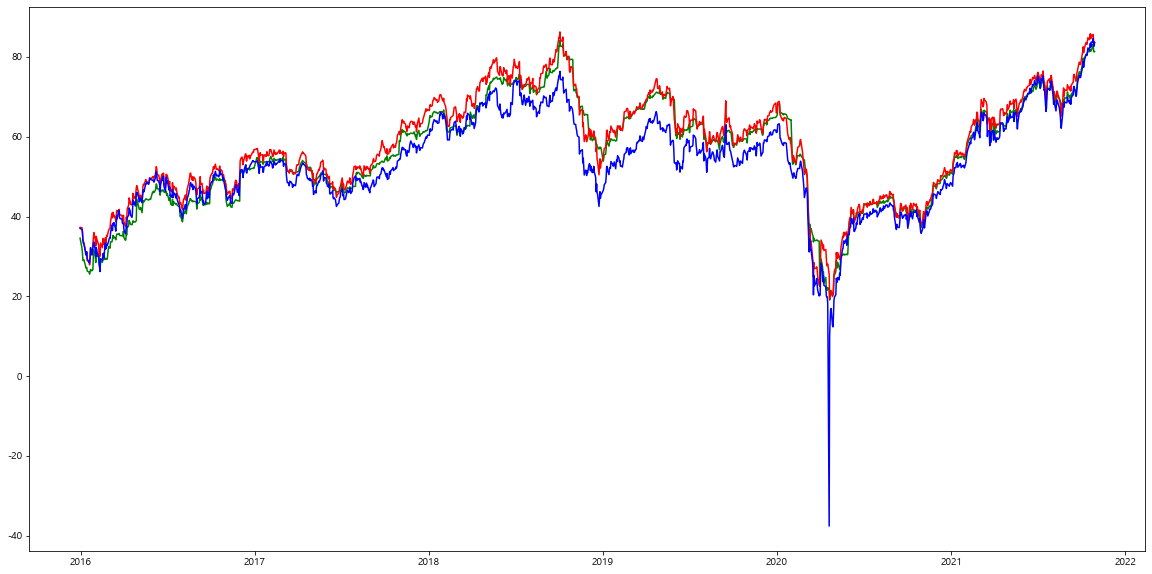

In [248]:
plt.figure(figsize = (20,10))
plt.plot(ndf['두바이유_유가(종가)'], color = 'green')
plt.plot(ndf['브렌트유_유가(종가)'], color = 'red')
plt.plot(ndf['텍사스유_유가(종가)'], color = 'blue')

In [236]:
ndf.corr()

,두바이유_유가(종가),브렌트유_유가(종가),텍사스유_유가(종가)
두바이유_유가(종가),1.000000,0.987888,0.955772
브렌트유_유가(종가),0.987888,1.000000,0.974065
텍사스유_유가(종가),0.955772,0.974065,1.000000


<AxesSubplot:>

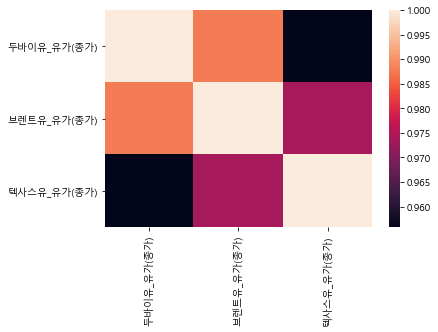

In [223]:
sns.heatmap(ndf.corr())

In [ ]:
# 두바이유

url_du = 'https://finance.naver.com/marketindex/worldDailyQuote.naver?marketindexCd=OIL_DU&fdtc=2'
L_d = []
for i in range(1,250):
    url_du_p = 'https://finance.naver.com/marketindex/worldDailyQuote.naver?marketindexCd=OIL_DU&fdtc=2&page={}'.format(i)
    
    res = requests.get(url_du_p)    
    soup = BeautifulSoup(res.text, 'html.parser')    
    path1 = 'body > div > table > tbody > tr'
    date = soup.select(path1)

    for i in date :
        i = re.sub('[\n\t]', '', i.text)
        L_d.append(i)

 # 추출된 리스트를 각 변수로 나눈다.
date = np.array([i[:10] for i in L_d ])
Close = np.array([i[10:15] for i in L_d ])

dic = {'날짜' : date, '종가' : Close}   #, '전일대비' : before, '등락율' : ratio}
df_Du = pd.DataFrame(dic)
df_Du['날짜'] = df_Du['날짜'].astype('datetime64[ns]')
df_Du['종가'] = df_Du['종가'].astype('float64')
